In [1]:
#importaciones de las librerias
import pandas as pd
import numpy as np
import sklearn as sl
import matplotlib.pyplot as plt
import mlxtend as mx
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
data=pd.read_csv("Estudiantes.csv")#Leemos el fichero csv
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Preparacion de los datos

In [3]:
#Agrupa la columna de día del mes de manera que cada uno corresponda a una semana usando una etiqueta de tipo String.
conditionlist = [
    (data['math score'] >= 0) & (data['math score'] <=25),
    (data['math score'] >= 26) & (data['math score'] <=51),
    (data['math score'] >= 52) & (data['math score'] <=77),
    (data['math score'] > 78)]
choicelist = ['muy bajam', 'bajam', 'mediam','altam']
data['math score'] = np.select(conditionlist, choicelist, default='Not Specified')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,mediam,72,74
1,female,group C,some college,standard,completed,mediam,90,88
2,female,group B,master's degree,standard,none,altam,95,93
3,male,group A,associate's degree,free/reduced,none,bajam,57,44
4,male,group C,some college,standard,none,mediam,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,altam,99,95
996,male,group C,high school,free/reduced,none,mediam,55,55
997,female,group C,high school,free/reduced,completed,mediam,71,65
998,female,group D,some college,standard,completed,mediam,78,77


In [4]:
#Agrupa la columna de día del mes de manera que cada uno corresponda a una semana usando una etiqueta de tipo String.
conditionlist = [
    (data['reading score'] >= 0) & (data['reading score'] <=25),
    (data['reading score'] >= 26) & (data['reading score'] <=50),
    (data['reading score'] >= 51) & (data['reading score'] <=76),
    (data['reading score'] > 76)]
choicelist = ['muy bajar', 'bajar', 'mediar','altar']
data['reading score'] = np.select(conditionlist, choicelist, default='Not Specified')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,mediam,mediar,74
1,female,group C,some college,standard,completed,mediam,altar,88
2,female,group B,master's degree,standard,none,altam,altar,93
3,male,group A,associate's degree,free/reduced,none,bajam,mediar,44
4,male,group C,some college,standard,none,mediam,altar,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,altam,altar,95
996,male,group C,high school,free/reduced,none,mediam,mediar,55
997,female,group C,high school,free/reduced,completed,mediam,mediar,65
998,female,group D,some college,standard,completed,mediam,altar,77


In [5]:
#Agrupa la columna de día del mes de manera que cada uno corresponda a una semana usando una etiqueta de tipo String.
conditionlist = [
    (data['writing score'] >= 0) & (data['writing score'] <=25),
    (data['writing score'] >= 26) & (data['writing score'] <=50),
    (data['writing score'] >= 51) & (data['writing score'] <=76),
    (data['writing score'] > 76)]
choicelist = ['muy bajaw', 'bajaw', 'mediaw','altaw']
data['writing score'] = np.select(conditionlist, choicelist, default='Not Specified')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,mediam,mediar,mediaw
1,female,group C,some college,standard,completed,mediam,altar,altaw
2,female,group B,master's degree,standard,none,altam,altar,altaw
3,male,group A,associate's degree,free/reduced,none,bajam,mediar,bajaw
4,male,group C,some college,standard,none,mediam,altar,mediaw
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,altam,altar,altaw
996,male,group C,high school,free/reduced,none,mediam,mediar,mediaw
997,female,group C,high school,free/reduced,completed,mediam,mediar,mediaw
998,female,group D,some college,standard,completed,mediam,altar,altaw


In [6]:
datos=data.iloc[:,5:8]
datos=np.array(datos)
datos

array([['mediam', 'mediar', 'mediaw'],
       ['mediam', 'altar', 'altaw'],
       ['altam', 'altar', 'altaw'],
       ...,
       ['mediam', 'mediar', 'mediaw'],
       ['mediam', 'altar', 'altaw'],
       ['mediam', 'altar', 'altaw']], dtype=object)

In [7]:
te = TransactionEncoder()
te_ary = te.fit(datos).transform(datos)
df = pd.DataFrame(te_ary, columns=te.columns_)
df=df.drop(columns='Not Specified')

## Primera Configuracion

In [8]:
association_rules1 = apriori(df, min_support=0.001,use_colnames=True)
association_rules1['length']=association_rules1['itemsets'].apply(lambda x: len(x))
association_rules1['frecuencia']=association_rules1['support']*len(data.index)
association_rules1

,support,itemsets,length,frecuencia
0,0.215,(altam),1,215.0
1,0.319,(altar),1,319.0
2,0.303,(altaw),1,303.0
3,0.154,(bajam),1,154.0
4,0.093,(bajar),1,93.0
...,...,...,...,...
57,0.005,"(bajar, muy bajam, bajaw)",3,5.0
58,0.007,"(bajar, mediam, mediaw)",3,7.0
59,0.021,"(mediam, mediar, bajaw)",3,21.0
60,0.394,"(mediar, mediam, mediaw)",3,394.0


## Segunda Configuracion

In [9]:
association_rules2 = apriori(df, min_support=0.01,use_colnames=True)
association_rules2['length']=association_rules2['itemsets'].apply(lambda x: len(x))
association_rules2['frecuencia']=association_rules2['support']*len(data.index)
association_rules2

,support,itemsets,length,frecuencia
0,0.215,(altam),1,215.0
1,0.319,(altar),1,319.0
2,0.303,(altaw),1,303.0
3,0.154,(bajam),1,154.0
4,0.093,(bajar),1,93.0
5,0.119,(bajaw),1,119.0
6,0.610,(mediam),1,610.0
7,0.584,(mediar),1,584.0
8,0.573,(mediaw),1,573.0
9,0.173,"(altam, altar)",2,173.0


## Tercera Configuracion

In [10]:
association_rules3 = apriori(df, min_support=0.1,use_colnames=True)
association_rules3['length']=association_rules3['itemsets'].apply(lambda x: len(x))
association_rules3['frecuencia']=association_rules3['support']*len(data.index)
association_rules3

,support,itemsets,length,frecuencia
0,0.215,(altam),1,215.0
1,0.319,(altar),1,319.0
2,0.303,(altaw),1,303.0
3,0.154,(bajam),1,154.0
4,0.119,(bajaw),1,119.0
5,0.610,(mediam),1,610.0
6,0.584,(mediar),1,584.0
7,0.573,(mediaw),1,573.0
8,0.173,"(altam, altar)",2,173.0
9,0.160,"(altam, altaw)",2,160.0


## ¿Que diferencias hay entre usar soporte y frecuencia?

### Soporte

In [11]:
association_rules1[ (association_rules1['length'] == 3) &
                   (association_rules1['support'] >= 0.001) ]

,support,itemsets,length,frecuencia
42,0.153,"(altam, altaw, altar)",3,153.0
43,0.020,"(altam, altar, mediaw)",3,20.0
44,0.007,"(altam, altaw, mediar)",3,7.0
45,0.035,"(altam, mediar, mediaw)",3,35.0
46,0.101,"(altaw, altar, mediam)",3,101.0
47,0.034,"(mediam, altar, mediaw)",3,34.0
48,0.001,"(bajam, altaw, mediar)",3,1.0
49,0.031,"(altaw, mediar, mediam)",3,31.0
50,0.053,"(bajam, bajar, bajaw)",3,53.0
51,0.005,"(bajam, bajar, mediaw)",3,5.0


### Frecuencia

In [12]:
association_rules1[ (association_rules1['length'] == 3) &
                   (association_rules1['frecuencia'] >= 0.001) ]

,support,itemsets,length,frecuencia
42,0.153,"(altam, altaw, altar)",3,153.0
43,0.020,"(altam, altar, mediaw)",3,20.0
44,0.007,"(altam, altaw, mediar)",3,7.0
45,0.035,"(altam, mediar, mediaw)",3,35.0
46,0.101,"(altaw, altar, mediam)",3,101.0
47,0.034,"(mediam, altar, mediaw)",3,34.0
48,0.001,"(bajam, altaw, mediar)",3,1.0
49,0.031,"(altaw, mediar, mediam)",3,31.0
50,0.053,"(bajam, bajar, bajaw)",3,53.0
51,0.005,"(bajam, bajar, mediaw)",3,5.0


La frecuencia es el numero de veces que aparece un itemset en el dataset y el soporte es la frecuencia entre el numero de transacciones del dataframe.
Por lo tanto no hay ninguna diferencia.

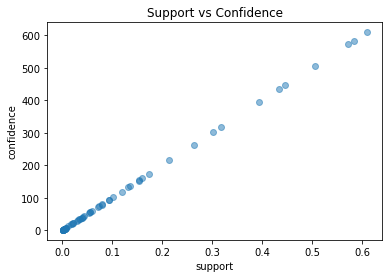

In [14]:
plt.scatter(association_rules1['support'], association_rules1['frecuencia'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('frecuencia')
plt.title('Support vs frecuencia')
plt.show()

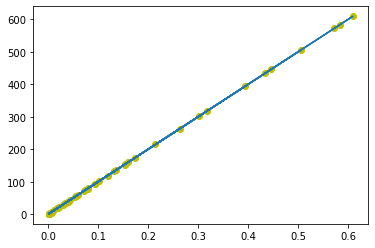

In [16]:
fit = np.polyfit(association_rules1['support'], association_rules1['frecuencia'], 1)
fit_fn = np.poly1d(fit)
plt.plot(association_rules1['support'], association_rules1['frecuencia'], 'yo', association_rules1['support'], 
 fit_fn(association_rules1['support']))

## ¿Qué tipo reglas desaparecen según la configuración usada y el tipo de puntuación? ¿Por qué? 

Desaparecen las reglas que no cumplen con los requeriminetos de la configuracion

## Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado curiosas obtenidas usando la clase association_rules y un par de configuraciones cambiando la variable metric y min_threshold.

In [19]:
rules1 = association_rules(association_rules1, metric="confidence", min_threshold=0.6)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(altam),(altar),0.215,0.319,0.173,0.804651,2.522417,0.104415,3.486071
1,(altam),(altaw),0.215,0.303,0.160,0.744186,2.456060,0.094855,2.724636
2,(altaw),(altar),0.303,0.319,0.264,0.871287,2.731308,0.167343,5.290846
3,(altar),(altaw),0.319,0.303,0.264,0.827586,2.731308,0.167343,4.042600
4,(bajar),(bajam),0.093,0.154,0.059,0.634409,4.119536,0.044678,2.314059


In [20]:
rules2 = association_rules(association_rules2, metric="confidence", min_threshold=0.6)
rules2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(altam),(altar),0.215,0.319,0.173,0.804651,2.522417,0.104415,3.486071
1,(altam),(altaw),0.215,0.303,0.160,0.744186,2.456060,0.094855,2.724636
2,(altaw),(altar),0.303,0.319,0.264,0.871287,2.731308,0.167343,5.290846
3,(altar),(altaw),0.319,0.303,0.264,0.827586,2.731308,0.167343,4.042600
4,(bajar),(bajam),0.093,0.154,0.059,0.634409,4.119536,0.044678,2.314059


In [21]:
rules3 = association_rules(association_rules3, metric="lift", min_threshold=0.4)
rules3.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(altam),(altar),0.215,0.319,0.173,0.804651,2.522417,0.104415,3.486071
1,(altam),(altaw),0.215,0.303,0.160,0.744186,2.456060,0.094855,2.724636
2,(altaw),(altar),0.303,0.319,0.264,0.871287,2.731308,0.167343,5.290846
3,(altar),(altaw),0.319,0.303,0.264,0.827586,2.731308,0.167343,4.042600
4,(mediar),(mediam),0.584,0.610,0.446,0.763699,1.251965,0.089760,1.650435


INTERPRETACION

## ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna manera como se comportan los mejores y peores estudiantes?

# SEGUNDA PARTE